In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
%cd drive

In [ ]:
%cd My\ Drive

In [ ]:
from google.colab import files
uploaded = files.upload()

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import imblearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from matplotlib import pyplot

In [2]:
raw = pd.read_csv('cgfinal414.csv')

In [3]:
raw = raw.drop(columns='id')

In [4]:
raw['cggad7'].value_counts()

0.0    300
1.0     97
Name: cggad7, dtype: int64

In [5]:
raw1 = raw.dropna()

In [6]:
one_hot = pd.get_dummies(raw1['StudyArm'])

In [7]:
raw11 = raw1.drop('StudyArm',axis = 1)

In [8]:
raw11 = raw11.join(one_hot)

In [9]:
raw1=raw11.reset_index()

In [10]:
raw1

,index,Age,Gender,gradecat,incomecat,racecat,Living,relationship_cat,GI_Lung,TTC3,...,ImpairedMS,calcimpairedCom,cgdistress,cggad7,cgphq2,SF12total,AGG_PHYS,AGG_MENT,Control,GA
0,6,68.0,0.0,3.0,3.0,1.0,1.0,1.0,3.0,2.0,...,0,0.0,1.0,1.0,0.0,106.520496,59.635147,46.885349,0,1
1,7,69.0,0.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,...,0,1.0,0.0,0.0,0.0,105.107170,45.895807,59.211363,0,1
2,8,57.0,0.0,2.0,3.0,1.0,2.0,3.0,1.0,2.0,...,0,0.0,0.0,0.0,0.0,105.878769,55.328368,50.550400,0,1
3,10,71.0,0.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,...,0,1.0,1.0,0.0,0.0,110.634352,51.428792,59.205560,0,1
4,11,52.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,...,0,0.0,1.0,1.0,0.0,104.744417,53.829841,50.914576,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,409,75.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,...,0,1.0,1.0,0.0,0.0,102.702713,58.715992,43.986721,0,1
376,410,71.0,0.0,3.0,2.0,1.0,1.0,1.0,3.0,2.0,...,0,0.0,1.0,1.0,0.0,87.114771,33.603316,53.511456,0,1
377,411,75.0,0.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,...,0,1.0,1.0,1.0,1.0,55.783994,15.928499,39.855495,0,1
378,412,67.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,...,0,1.0,0.0,1.0,0.0,95.192964,47.181300,48.011665,0,1


In [11]:
X = raw1[['Age', 'Gender', 'gradecat', 'incomecat', 'racecat', 'Living',
       'relationship_cat', 'GI_Lung', 'TTC3', 'TTC5', 'TTC6a', 'TTC6b',
       'TTC6c', 'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom', 'Control',
       'GA']]

In [12]:
y = raw1['cggad7']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [15]:
X_train.shape
print(sorted(Counter(y_train).items()))

print(sorted(Counter(y_test).items()))

[(0.0, 216), (1.0, 69)]
[(0.0, 72), (1.0, 23)]


In [16]:
X_train.shape
print(sorted(Counter(y_train).items()))

print(sorted(Counter(y_test).items()))

[(0.0, 216), (1.0, 69)]
[(0.0, 72), (1.0, 23)]


In [17]:
X_test.shape

(95, 26)

In [18]:
y_test.shape

(95,)

In [19]:
X_test

,Age,Gender,gradecat,incomecat,racecat,Living,relationship_cat,GI_Lung,TTC3,TTC5,...,cognition,nutrition,phy_performance,function,ImpairedCom,psychological,ImpairedMS,calcimpairedCom,Control,GA
370,72.0,0.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,...,1,1,1,1,1,1,0,1.0,0,1
30,78.0,0.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,...,1,1,1,1,0,1,0,1.0,0,1
26,80.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,...,0,1,1,1,1,0,0,0.0,1,0
325,72.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,1,1,1,1,0,0,0,0.0,1,0
292,69.0,0.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,0.0,...,1,1,1,0,1,0,0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,78.0,0.0,3.0,3.0,1.0,2.0,1.0,2.0,2.0,1.0,...,0,0,1,1,0,0,1,1.0,1,0
61,75.0,1.0,3.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,...,0,1,1,1,1,0,1,0.0,1,0
335,86.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,...,0,1,1,1,1,0,0,1.0,0,1
266,73.0,1.0,3.0,3.0,1.0,2.0,1.0,3.0,2.0,1.0,...,0,1,1,0,0,0,0,0.0,1,0


Text(0.5, 1.0, 'Class Distributions \n (0: Negative || 1: Positive)')

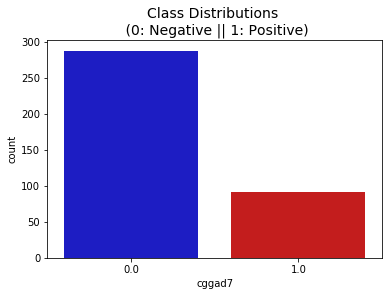

In [20]:
import seaborn as sns
colors = ["#0101DF", "#DF0101"]

sns.countplot('cggad7', data=raw1, palette=colors)
plt.title('Class Distributions \n (0: Negative || 1: Positive)', fontsize=14)

In [21]:
y.shape

(380,)

In [35]:
print(sorted(Counter(y).items()))

[(0.0, 288), (1.0, 92)]


In [36]:
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from collections import Counter

In [37]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE

from imblearn.over_sampling import KMeansSMOTE
over = SVMSMOTE(random_state=0)

T-SNE took 3.9 s
PCA took 0.0041 s
Truncated SVD took 0.011 s


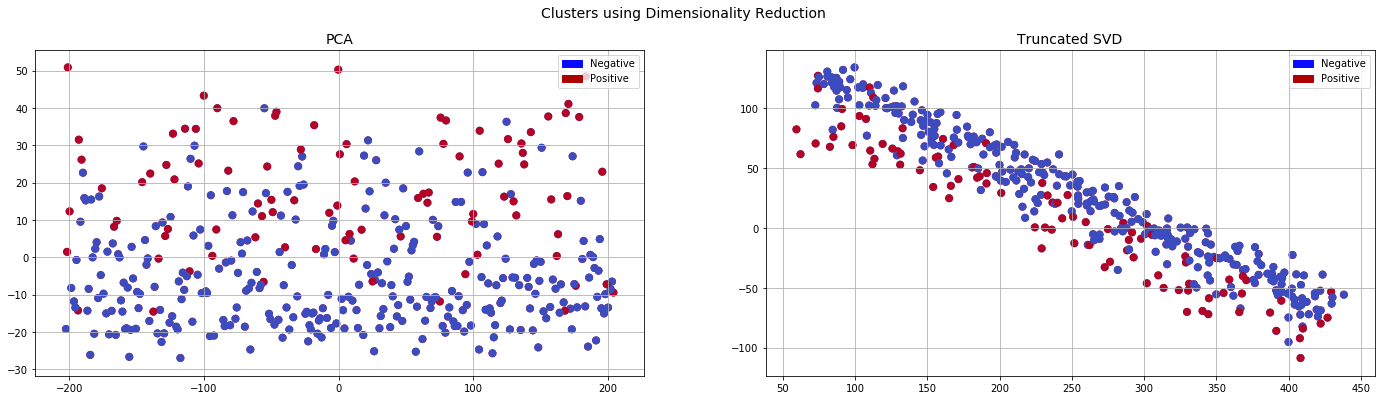

In [38]:
import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
# New_df is from the random undersample data (fewer instances)
X = raw1.drop('cggad7', axis=1)
y = raw1['cggad7']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

import matplotlib.patches as mpatches
f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Negative')
red_patch = mpatches.Patch(color='#AF0000', label='Positive')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Neg', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Pos', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Neg', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Pos', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [39]:
# X_train1,y_train1 = over.fit_sample(X,y)
X_train1,y_train1 = over.fit_resample(X, y)
print(sorted(Counter(y_train1).items()))

[(0.0, 288), (1.0, 288)]


In [27]:

# from imblearn.combine import SMOTETomek
# # smote_tomek = SMOTETomek(random_state=0)

# X_train3,y_train3= smote_tomek.fit_resample(X,y)

# print(sorted(Counter(y_train3).items()))

[(0.0, 281), (1.0, 281)]


In [28]:
X.shape

(380, 32)

In [40]:
new_df=X_train1
new_df['cggad7']=y_train1


In [45]:
import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('cggad7', axis=1)
y = new_df['cggad7']
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 5.4 s
PCA took 0.014 s
Truncated SVD took 0.009 s


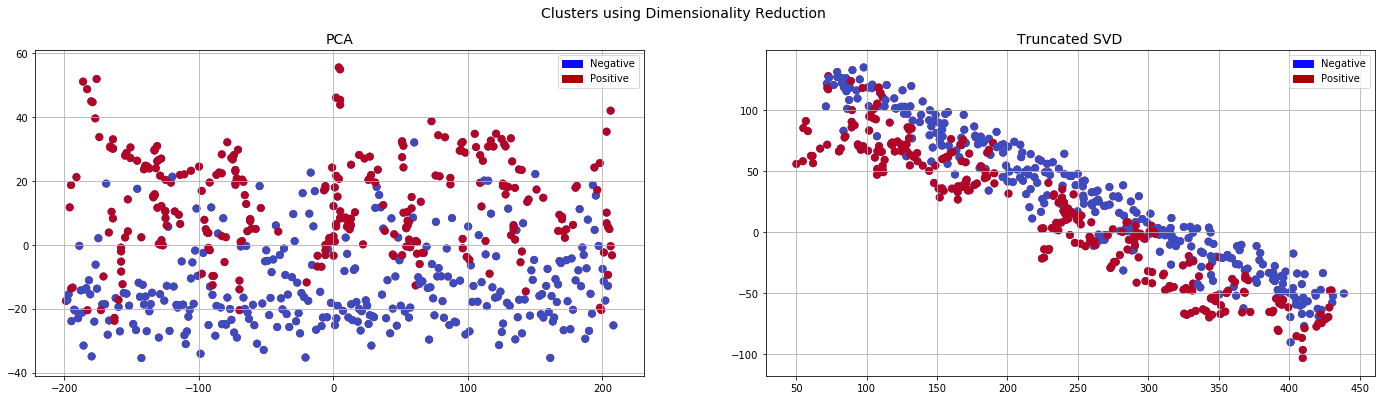

In [46]:

import matplotlib.patches as mpatches
f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Negative')
red_patch = mpatches.Patch(color='#AF0000', label='Positive')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Negative', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Positive', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Negative', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Positive', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [58]:
# from numpy import mean
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier

# # define model
# model1 = DecisionTreeClassifier()
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model1, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [194]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.linear_model import LogisticRegression
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrf = Pipeline([
        ('smote', BorderlineSMOTE(random_state=42)),
        ('lgr',  LogisticRegression(random_state=42))
    ])

param_grid = {

}
# Create a based model

# Instantiate the grid search model
grid_searchlgr = GridSearchCV(estimator = modelrf, param_grid = param_grid,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1)

In [195]:
grid_searchlgr.fit(X_train, y_train)
grid_searchlgr.best_params_

d:\anaconda\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{}

In [196]:
grid_searchlgr.best_score_

0.675342642254407

In [197]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrf = Pipeline([
        ('smote', BorderlineSMOTE(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ])

param_grid = {
    'rf__max_depth': [5,20,40],
    'rf__max_features': [0.05, 0.07,0.13],
    'rf__min_samples_split': [2, 3, 4],
    'rf__min_samples_leaf': [1, 2,3],
    'rf__n_estimators': [45, 60,110],
    'rf__bootstrap': [True, False]

}
# Create a based model

# Instantiate the grid search model
grid_searchrf = GridSearchCV(estimator = modelrf, param_grid = param_grid,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1)

In [198]:
grid_searchrf.fit(X_train, y_train)
grid_searchrf.best_params_

{'rf__bootstrap': True,
 'rf__max_depth': 5,
 'rf__max_features': 0.13,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 3,
 'rf__n_estimators': 60}

In [199]:
grid_searchrf.best_score_

0.7432056194125158

In [200]:
rf = pd.DataFrame(grid_search.cv_results_)

In [201]:
rf.to_csv("UPGRADEDCGGAD7_RF_RESULT.csv")

In [202]:
grid_searchrf.score(X_test,y_test)

0.6896551724137931

In [203]:
rfsmotey = grid_searchrf.predict(X_test)



In [204]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
rfsmotey = grid_searchlgr.predict(X_test)
CM = confusion_matrix(y_test, rfsmotey)
print(CM)


[[56  4]
 [ 8  8]]


In [205]:
# import seaborn as sn
# import pandas as pd
# import matplotlib.pyplot as plt

# plt.figure(figsize = (10,7))
# sn.heatmap(CM, annot=True, annot_kws={"size": 20},fmt="d")


In [206]:
grid_searchrf.score(X_test,y_test)
rfsmotey = grid_searchrf.predict(X_test)
CM = confusion_matrix(y_test, rfsmotey)
print(CM)

[[57  3]
 [ 6 10]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.779
RF: ROC AUC=0.885


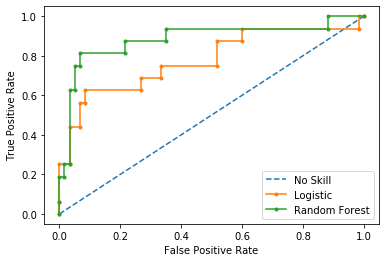

In [209]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsrf = grid_searchrf.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsrf = lr_probsrf[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, lr_probsrf)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('RF: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, lr_probsrf)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [158]:
rfsmotey

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1.])

In [210]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(X_test, lr_probs)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")    
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")    
    plt.xlabel("Threshold")    
    plt.legend(loc="upper left")    
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

ValueError: continuous-multioutput format is not supported

In [179]:
X_test.shape

(76, 32)

In [36]:
!pip install mlxtend

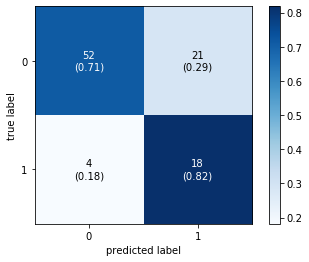

In [41]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[52, 21],
                   [4, 18]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Confusion matrix, without normalization
[[67  1]
 [24  3]]
Normalized confusion matrix
[[0.98529412 0.01470588]
 [0.88888889 0.11111111]]


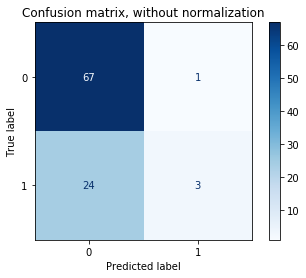

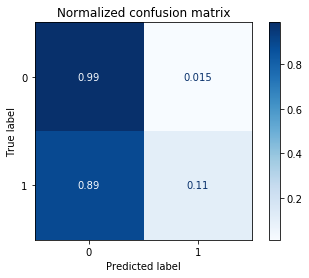

In [38]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(grid_search, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrf = Pipeline([
        ('smote', SVMSMOTE(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ])

param_grid = {
'rf__max_features': [0.07,0.13, 0.15, 0.25],
        'rf__n_estimators': [10,25,45, 60,110, 148, 200],
        'rf__min_samples_split': [2, 3, 5, 8, 12],
         'rf__min_samples_leaf': [1, 2, 4,8],
        'rf__bootstrap': [True, False],
        'rf__max_depth': [10, 20,40, 60]
}
# Create a based model

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = modelrf, param_grid = param_grid,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)


In [198]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrf = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ])

param_grid = {
'rf__max_features': [0.07,0.13, 0.15, 0.25],
        'rf__n_estimators': [10,25,45, 60,110, 148, 200],
        'rf__min_samples_split': [2, 3, 5, 8, 12],
         'rf__min_samples_leaf': [1, 2, 4,8],
        'rf__bootstrap': [True, False],
        'rf__max_depth': [10, 20,40, 60]
}
# Create a based model

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = modelrf, param_grid = param_grid,scoring='recall',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)

In [199]:
grid_search.fit(X_train, y_train)
grid_search.best_params_
dfgsrs = pd.DataFrame(grid_search.cv_results_)

Fitting 5 folds for each of 4480 candidates, totalling 22400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 1692 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 2844 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4284 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 5112 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6012 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 6984 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 8028 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 9144 tasks      |

{'rf__bootstrap': False,
 'rf__max_depth': 10,
 'rf__max_features': 0.25,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 10}

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [129]:
rfsmoteyprob = grid_search.predict_proba(X_test)

In [152]:
rfsmotey1=(rfsmoteyprob[:,1]>=0.4).astype(int)

In [153]:
CM = confusion_matrix(y_test, rfsmotey1)
print(CM)

[[56  4]
 [ 4 12]]


In [190]:

from sklearn.metrics import precision_recall_curve
y_scores=grid_search.predict_proba(X_test)[:, 1]
p, r, thresholds = precision_recall_curve(y_test, y_scores)


In [202]:
y_scores

array([0.26268978, 0.42697756, 0.27738625, 0.22430559, 0.48945217,
       0.11229654, 0.16570831, 0.22747691, 0.2355933 , 0.74379077,
       0.21214388, 0.50835868, 0.35100903, 0.16195297, 0.16823074,
       0.26220595, 0.44065014, 0.52890611, 0.25782902, 0.20612968,
       0.22357384, 0.410474  , 0.22137345, 0.39033795, 0.14168928,
       0.21021392, 0.16440516, 0.7692998 , 0.36175117, 0.49777268,
       0.48955218, 0.52439655, 0.43666306, 0.50071789, 0.24498126,
       0.47762741, 0.14564516, 0.15776395, 0.51864897, 0.36976247,
       0.22679169, 0.39588754, 0.13877689, 0.29397747, 0.20486919,
       0.18405569, 0.41989285, 0.2020097 , 0.16701566, 0.17640813,
       0.2035552 , 0.33069846, 0.5425533 , 0.09123975, 0.47867998,
       0.20143434, 0.42989943, 0.2202706 , 0.21343142, 0.14665096,
       0.23229947, 0.14882279, 0.45316058, 0.53006452, 0.17336158,
       0.31459373, 0.64327716, 0.20054868, 0.3377542 , 0.27732754,
       0.20165865, 0.26622068, 0.20657384, 0.12396254, 0.36566

In [196]:
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.33):
    
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

     pred_neg  pred_pos
neg        70         3
pos        11        11


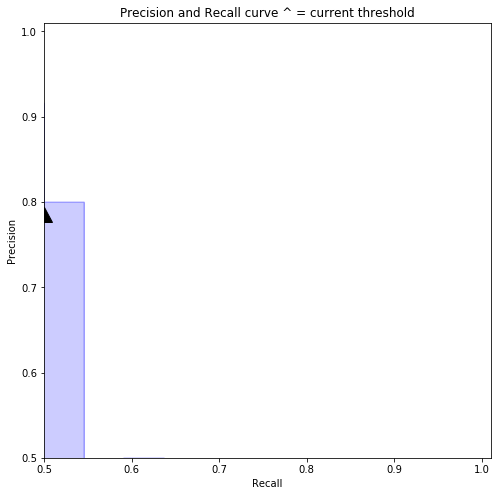

In [197]:
precision_recall_threshold(p, r, thresholds, t=0.5)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.654


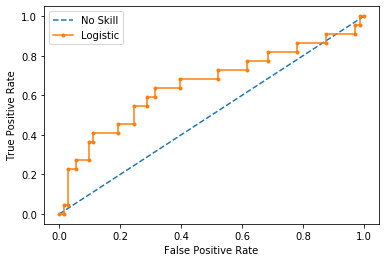

In [72]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [425]:
lr_probs = grid_search.predict_proba(X_test)

In [103]:
lr_probs=np.array([[0.75362434, 0.24637566],
       [0.52824652, 0.47175348],
       [0.71518721, 0.28481279],
       [0.71534892, 0.28465108],
       [0.58303129, 0.41696871],
       [0.84394992, 0.15605008],
       [0.85618635, 0.14381365],
       [0.64622697, 0.35377303],
       [0.75215263, 0.24784737],
       [0.43073395, 0.56926605],
       [0.72607105, 0.27392895],
       [0.63691921, 0.36308079],
       [0.66019034, 0.33980966],
       [0.77531128, 0.22468872],
       [0.73159206, 0.26840794],
       [0.70202738, 0.29797262],
       [0.59457181, 0.40542819],
       [0.35939422, 0.64060578],
       [0.6881729 , 0.3118271 ],
       [0.75238587, 0.24761413],
       [0.83960681, 0.16039319],
       [0.70251975, 0.29748025],
       [0.74122748, 0.25877252],
       [0.71107823, 0.28892177],
       [0.72252732, 0.27747268],
       [0.82027469, 0.17972531],
       [0.84176447, 0.15823553],
       [0.49467179, 0.50532821],
       [0.5021288 , 0.4978712 ],
       [0.57831781, 0.42168219],
       [0.54997077, 0.45002923],
       [0.63080406, 0.36919594],
       [0.6195034 , 0.3804966 ],
       [0.58673515, 0.41326485],
       [0.80343299, 0.19656701],
       [0.62837869, 0.37162131],
       [0.87759831, 0.12240169],
       [0.88491334, 0.11508666],
       [0.47734451, 0.52265549],
       [0.70394551, 0.29605449],
       [0.79982513, 0.20017487],
       [0.46743173, 0.53256827],
       [0.70283724, 0.29716276],
       [0.71869786, 0.28130214],
       [0.58569557, 0.41430443],
       [0.66051971, 0.33948029],
       [0.68584211, 0.31415789],
       [0.70540919, 0.29459081],
       [0.8599931 , 0.1400069 ],
       [0.76510514, 0.23489486],
       [0.78424958, 0.21575042],
       [0.76374059, 0.23625941],
       [0.44875105, 0.55124895],
       [0.81851357, 0.18148643],
       [0.62982878, 0.37017122],
       [0.75716337, 0.24283663],
       [0.50217673, 0.49782327],
       [0.73660213, 0.26339787],
       [0.81286333, 0.18713667],
       [0.86965676, 0.13034324],
       [0.69823015, 0.30176985],
       [0.89935973, 0.10064027],
       [0.53685764, 0.46314236],
       [0.4015484 , 0.5984516 ],
       [0.61182102, 0.38817898],
       [0.66067747, 0.33932253],
       [0.39286524, 0.60713476],
       [0.8034471 , 0.1965529 ],
       [0.6295671 , 0.3704329 ],
       [0.6744612 , 0.3255388 ],
       [0.84618324, 0.15381676],
       [0.75307939, 0.24692061],
       [0.68521509, 0.31478491],
       [0.85976635, 0.14023365],
       [0.66190885, 0.33809115],
       [0.44829422, 0.55170578],
       [0.81598695, 0.18401305],
       [0.71911197, 0.28088803],
       [0.80962193, 0.19037807],
       [0.76281001, 0.23718999],
       [0.51235797, 0.48764203],
       [0.67678882, 0.32321118],
       [0.52414622, 0.47585378],
       [0.68420916, 0.31579084],
       [0.19287207, 0.80712793],
       [0.70353381, 0.29646619],
       [0.82130201, 0.17869799],
       [0.3811858 , 0.6188142 ],
       [0.82646122, 0.17353878],
       [0.6465669 , 0.3534331 ],
       [0.58033253, 0.41966747],
       [0.63602852, 0.36397148],
       [0.86193268, 0.13806732],
       [0.49569219, 0.50430781],
       [0.74625898, 0.25374102]])

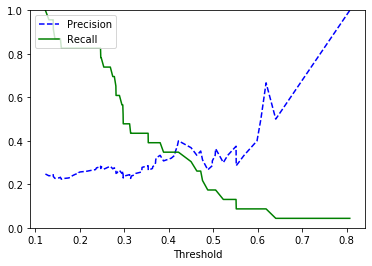

Logistic: f1=0.300 auc=0.305


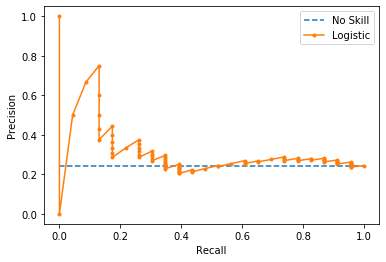

In [115]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
lr_probs = grid_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid_search.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [419]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
# Create the parameter grid based on the results of random search 

rf12 =  RandomForestClassifier(random_state=42,bootstrap= True,
 max_depth= 10,
 max_features=0.25,
 min_samples_leaf=8,
 min_samples_split=2,
 n_estimators=45)

cv_results12 = cross_validate(rf12, X_train, y_train, cv=5,return_train_score=True,scoring='f1',n_jobs = -1)    


In [420]:
rf12.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=0.25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [421]:
rfy = rf12.predict(X_test)

In [422]:
CM1 = confusion_matrix(y_test, rfy)
print(CM1)

[[73  0]
 [22  0]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.678


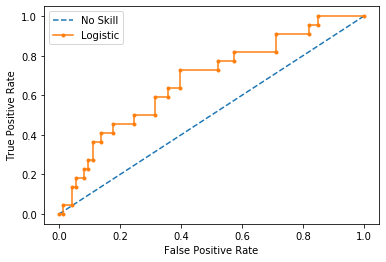

In [423]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = rf12.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.000 auc=0.359


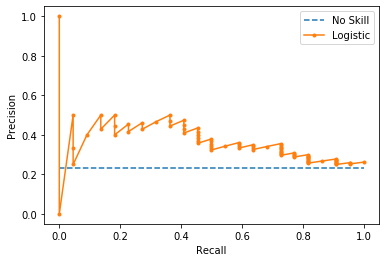

In [424]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from matplotlib import pyplot
# generate 2 class dataset
lr_probs =rf12.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = rf12.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrf = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ])

param_grid = {
'rf__max_features': [0.07,0.13, 0.15, 0.25],
        'rf__n_estimators': [10,25,45, 60,110, 148, 200],
        'rf__min_samples_split': [2, 3, 5, 8, 12],
         'rf__min_samples_leaf': [1, 2, 4,8],
        'rf__bootstrap': [True, False],
        'rf__max_depth': [10, 20,40, 60]
}
# Create a based model

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = modelrf, param_grid = param_grid,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)

In [ ]:
# ------------------------------------

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
# Create the parameter grid based on the results of random search 

rf12 =  RandomForestClassifier(random_state=42,bootstrap= False,
 max_depth= 20,
 max_features=0.13,
 min_samples_leaf=1,
 min_samples_split=4,
 n_estimators=60)

cv_results12 = cross_validate(rf12, X_train, y_train, cv=5,return_train_score=True,scoring='accuracy',n_jobs = -1)    




In [43]:
cv_results12['test_score'].mean()

0.7719298245614036

In [44]:
rf12.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=0.13,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [45]:
rf12.score(X_test,y_test)

0.7263157894736842

In [55]:
rfy = rf12.predict(X_test)

In [72]:
y_test.value_counts()

0.0    68
1.0    27
Name: cggad7, dtype: int64

In [56]:
CM1 = confusion_matrix(y_test, rfy)
print(CM1)

[[67  1]
 [25  2]]


In [80]:
dffff=pd.DataFrame({"predicted":pd.Series(rfy),"Actual":pd.Series(list(y_test))})

In [82]:
pd.set_option('display.max_rows',303403)

In [87]:
dffff.predicted.value_counts()

0.0    92
1.0     3
Name: predicted, dtype: int64

In [62]:
from sklearn.svm import SVC
random_state = 42
modelsvm = Pipeline([
        # Original SMOTE class
        ('smote', BorderlineSMOTE(random_state=random_state)),
        ('svm', SVC(random_state=42, verbose=2,kernel='rbf', probability=True))
    ])

# modelsvm = SVC(random_state=42, verbose=2,kernel='rbf')

from sklearn.model_selection import GridSearchCV


param_gridsvm = {'svm__C': [0.1, 1, 10,20,50, 100,200,500,1000],  
              'svm__gamma': [1,0.5, 0.1, 0.01, 0.05, 0.001,0.005, 0.0001,0.0005]}  


svmgridsearch = GridSearchCV(estimator=modelsvm, param_grid=param_gridsvm, n_jobs=-1, 
                             cv=5, verbose=2, return_train_score=True,scoring="precision")

svmgridsearch.fit(X_train, y_train)

df_gridsearchsvmk = pd.DataFrame(svmgridsearch.cv_results_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 382 out of 405 | elapsed:    2.8s remaining:    0.1s


[LibSVM]

[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    3.0s finished


In [45]:
df_gridsearchsvmk.to_csv("svm623AM.csv")

In [63]:
svmgridsearch.best_params_

{'svm__C': 1, 'svm__gamma': 0.1}

In [64]:
svmgridsearch.best_score_

0.4438311688311688

In [65]:
svmgridsearch.score(X_test,y_test)

0.15789473684210525

In [66]:
svcsmotey = svmgridsearch.predict(X_test)

In [67]:
CM2 = confusion_matrix(y_test,svcsmotey)
print(CM2)

[[56 16]
 [20  3]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.497


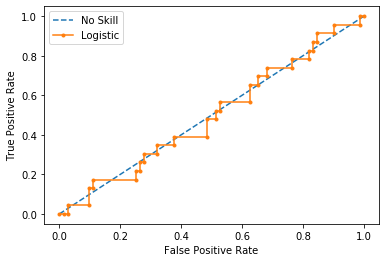

In [35]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs =svmgridsearch.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [36]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
# Create the parameter grid based on the results of random search 

sv12 =  SVC(random_state=3,gamma=0.1,C=1,kernel='rbf')

cv_resultssv12 = cross_validate(sv12, X_train, y_train, cv=5,return_train_score=True,scoring='accuracy', n_jobs = -1)    

sv12.fit(X_train, y_train)
sv12.score(X_test,y_test)

0.7157894736842105

In [37]:

cv_resultssv12['test_score'].mean()

0.7473684210526316

In [38]:
svcy = sv12.predict(X_test)

In [39]:
CM3 = confusion_matrix(y_test,svcy)
print(CM3)

[[68  4]
 [23  0]]


In [40]:
from sklearn.svm import SVC
random_state = 42
modelsvmf1 = Pipeline([
        # Original SMOTE class
        ('svm', SVC(random_state=42, verbose=2,probability=True,kernel='rbf'))
    ])

# modelsvm = SVC(random_state=42, verbose=2,kernel='rbf')

from sklearn.model_selection import GridSearchCV



param_gridsvmf1 = {'svm__C': [0.1, 1, 10,20,50, 100,200,500,1000],  
              'svm__gamma': [1,0.5, 0.1, 0.01, 0.05, 0.001,0.005, 0.0001,0.0005]}  
  


svmgridsearchf1 = GridSearchCV(estimator=modelsvmf1, param_grid=param_gridsvmf1, n_jobs=-1, 
                             cv=5, verbose=2, return_train_score=True,scoring="precision")

svmgridsearchf1.fit(X_train, y_train)
svmgridsearchf1.best_score_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 382 out of 405 | elapsed:    1.6s remaining:    0.0s


[LibSVM]

[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    1.8s finished


0.76

In [41]:
from sklearn.svm import SVC
random_state = 42
modelsvmf1 = Pipeline([
        # Original SMOTE class
        ('svm', SVC(random_state=42, verbose=2,probability=True,kernel='rbf'))
    ])

# modelsvm = SVC(random_state=42, verbose=2,kernel='rbf')

from sklearn.model_selection import GridSearchCV



param_gridsvmf1 = {'svm__C': [0.1, 1, 10,20,50, 100,200,500,1000],  
              'svm__gamma': [1,0.5, 0.1, 0.01, 0.05, 0.001,0.005, 0.0001,0.0005]}  
  


svmgridsearchf1 = GridSearchCV(estimator=modelsvmf1, param_grid=param_gridsvmf1, n_jobs=-1, 
                             cv=5, verbose=2, return_train_score=True,scoring="precision")

svmgridsearchf1.fit(X_train, y_train)
svmgridsearchf1.best_score_


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 366 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 382 out of 405 | elapsed:    1.7s remaining:    0.0s


[LibSVM]

[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    1.8s finished


0.76

In [84]:
from sklearn.svm import SVC
random_state = 42
modelsvmf1 = Pipeline([
        # Original SMOTE class
        ('svm', SVC(random_state=42, verbose=2,kernel='rbf',probability=True, class_weight = {0:1,1:3}))
    ])

# modelsvm = SVC(random_state=42, verbose=2,kernel='rbf')

from sklearn.model_selection import GridSearchCV



param_gridsvmf1 = {'svm__C': [0.1, 1, 10,20,50, 100,200,500,1000],  
              'svm__gamma': [1,0.5, 0.1, 0.01, 0.05, 0.001,0.005, 0.0001,0.0005]}  
  


svmgridsearchf1 = GridSearchCV(estimator=modelsvmf1, param_grid=param_gridsvmf1, n_jobs=-1, 
                             cv=5, verbose=2, return_train_score=True,scoring="f1")

svmgridsearchf1.fit(X_train, y_train)

df_gridsearchsvmkf1 = pd.DataFrame(svmgridsearchf1.cv_results_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


[LibSVM]

[Parallel(n_jobs=-1)]: Done 382 out of 405 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    1.8s finished


In [85]:
svmgridsearchf1.best_score_

0.44000000000000006

In [86]:
y_train.value_counts()

0.0    220
1.0     65
Name: cggad7, dtype: int64

In [87]:
svmgridsearchf1.best_score_

0.44000000000000006

In [88]:
svmgridsearchf1.best_params_

{'svm__C': 500, 'svm__gamma': 0.001}

In [89]:
reswithoutsmote=svmgridsearchf1.predict(X_test)

In [90]:
pd.Series(reswithoutsmote).value_counts()

0.0    65
1.0    30
dtype: int64

In [91]:
CM2 = confusion_matrix(y_test,reswithoutsmote)
print(CM2)

[[48 20]
 [17 10]]


In [97]:
from sklearn.svm import SVC
random_state = 42
modelsvmf1 = Pipeline([
        # Original SMOTE class
        ('smote', BorderlineSMOTE(random_state=random_state)),
    
        ('svm', SVC(random_state=42, verbose=2,kernel='rbf',probability=True))
    ])

# modelsvm = SVC(random_state=42, verbose=2,kernel='rbf')

from sklearn.model_selection import GridSearchCV



param_gridsvmf1 = {'svm__C': [0.1, 1, 10,20,50, 100,200,500,1000],  
              'svm__gamma': [1,0.5, 0.1, 0.01, 0.05, 0.001,0.005, 0.0001,0.0005]}  

svmgridsearchf1 = GridSearchCV(estimator=modelsvmf1, param_grid=param_gridsvmf1, n_jobs=-1, 
                             cv=5, verbose=2, return_train_score=True,scoring="f1")

svmgridsearchf1.fit(X_train, y_train)

df_gridsearchsvmkf1 = pd.DataFrame(svmgridsearchf1.cv_results_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 372 tasks      | elapsed:    2.8s


[LibSVM]

[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    3.1s finished


In [93]:
svmwithSVMsmote=svmgridsearchf1.best_estimator_.predict(X_test)

In [94]:
CM2 = confusion_matrix(y_test,svmwithSVMsmote)
print(CM2)

[[49 23]
 [14  9]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.568


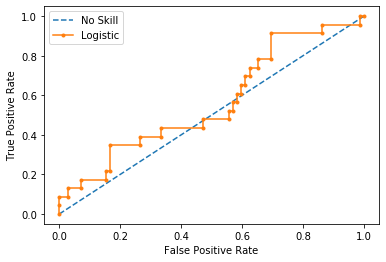

In [95]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs =svmgridsearchf1.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [70]:
from sklearn.svm import SVC
random_state = 42
modelsvmf1 = Pipeline([
        # Original SMOTE class
        ('smote', BorderlineSMOTE(random_state=random_state)),
        ('svm', SVC(random_state=42, verbose=2,kernel='rbf',probability=True))
    ])

# modelsvm = SVC(random_state=42, verbose=2,kernel='rbf')

from sklearn.model_selection import GridSearchCV



param_gridsvmf1 = {'svm__C': [0.1, 1, 10,20,50, 100,200,500,1000],  
              'svm__gamma': [1,0.5, 0.1, 0.01, 0.05, 0.001,0.005, 0.0001,0.0005]}  
  


svmgridsearchf1 = GridSearchCV(estimator=modelsvmf1, param_grid=param_gridsvmf1, n_jobs=-1, 
                             cv=5, verbose=2, return_train_score=True,scoring="f1")

svmgridsearchf1.fit(X_train, y_train)

df_gridsearchsvmkf1 = pd.DataFrame(svmgridsearchf1.cv_results_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 372 tasks      | elapsed:    2.7s


[LibSVM]

[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    3.0s finished


In [71]:
svmgridsearchf1.best_score_

0.4046462455950122

In [72]:
reswithoutsmote=svmgridsearchf1.predict(X_test)

In [73]:
pd.Series(reswithoutsmote).value_counts()

0.0    63
1.0    32
dtype: int64

In [86]:
CM2 = confusion_matrix(y_test,reswithoutsmote)
print(CM2)

[[49 23]
 [14  9]]


In [87]:
y_test.value_counts()

0.0    72
1.0    23
Name: cggad7, dtype: int64

In [88]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs =svmgridsearchf1.predict_proba(X_test)

In [89]:
lr_probs

array([[0.3962503 , 0.6037497 ],
       [0.63336547, 0.36663453],
       [0.68074464, 0.31925536],
       [0.64932953, 0.35067047],
       [0.603129  , 0.396871  ],
       [0.88298398, 0.11701602],
       [0.78846081, 0.21153919],
       [0.61106613, 0.38893387],
       [0.66459848, 0.33540152],
       [0.9509273 , 0.0490727 ],
       [0.54893671, 0.45106329],
       [0.44554156, 0.55445844],
       [0.31568293, 0.68431707],
       [0.27876885, 0.72123115],
       [0.76180008, 0.23819992],
       [0.69394085, 0.30605915],
       [0.61313194, 0.38686806],
       [0.32389935, 0.67610065],
       [0.94246763, 0.05753237],
       [0.83327704, 0.16672296],
       [0.57711464, 0.42288536],
       [0.48085071, 0.51914929],
       [0.78022603, 0.21977397],
       [0.63847448, 0.36152552],
       [0.69944583, 0.30055417],
       [0.87089484, 0.12910516],
       [0.23951237, 0.76048763],
       [0.73599431, 0.26400569],
       [0.90894012, 0.09105988],
       [0.39441165, 0.60558835],
       [0.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.568


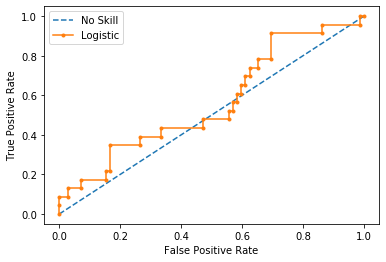

In [90]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs =svmgridsearchf1.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()